# Tutorial 0b: *CTSM Simulations at NEON Tower Sites*

This tutorial is an introduction to running the Community Terrestrial Systems Model (CTSM) at [NEON tower sites](https://www.neonscience.org/).  It will guide you through running a simulation and provides example visualization of the simulation results. If you want to dive deeper, after you complete a NEON tower simulation in this tutorial, you can use the [NEON_Visualization_Tutorial](https://github.com/NCAR/NEON-visualization) to explore observation and model data further.
<br><br>

![NEON Tower](../images/STER_tower.png)


**A few notes about the model:** There are several configuration options of CTSM, and throughout this tutorial we will use the Community Land Model (CLM) configuration which is the climate and biogeochemistry mode of CTSM. Throughout the rest of this tutorial, we refer to the model as CLM and will use version 5.1 with active biogeochemistry (CLM5.1-BGC).

Additional information about CTSM and CLM is available [on the website](https://www.cesm.ucar.edu/models/cesm2/land/), including [technical documentation](https://escomp.github.io/ctsm-docs/versions/master/html/tech_note/index.html), a [user's guide](https://escomp.github.io/ctsm-docs/versions/master/html/users_guide/index.html), and a [quickstart guide](https://escomp.github.io/CESM/release-cesm2/quickstart.html#create-a-case) for running various model configurations beyond what is covered in this tutorial.

Specifically, this example runs a single point case with data from a flux tower that's part of the National Ecological Observatory Network (NEON).  You can find out more about the [NCAR-NEON collaboration at this website](https://github.com/NCAR/NEON-visualization).  This effort aims to links NCAR’s modeling capabilities with NEON’s measurement network through an NSF supported cyberinfrastructure project.

**Questions about this tutorial?** Please post them on the [CTSM forum in the CESM Bulletin Board](https://bb.cgd.ucar.edu/cesm/forums/ctsm-clm-mosart-rtm.134/). Note that this resource will require you to register and log in so that you can be notified of responses to your inquiries. You can also file issues on the [CTSM tutorial 2022 GitHub repository](https://github.com/NCAR/CTSM-Tutorial-2022).
***

## In this tutorial

The tutorial has several components. Below you will find steps to: 
1. Set up and run a simulation
2. Locate CLM model data
3. Look at plots of simulated soil temperature and moisture data

<h2> 1. Set up and run a simulation</h2>

*This step guides you through running a CLM model simulation for a NEON flux tower using meteorology observations from the tower. Here, the many steps to run CLM are condensed into a single function. On Day 2 of the tutorial we'll provide instructions for modifying code.* <br>

***
<h4>1.1 Select a NEON tower site to simulate.</h4>

NEON towers currently available for simulation include:  

>ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD.  

The [NEON website](https://www.neonscience.org/field-sites/explore-field-sites) describes tower sites in more detail.

Before running the below code, keep in mind:
- The executable code below selects the **KONZ** site for simulation. If you would like to simulate a different tower, select the NEON tower from the above list and change the 4-character site name inside the quotes below.
- The site must be defined correctly so you do not get an error in the next step.
    - use all capital letters 
    - double-check that the letters match one of the above site names

*Execute the cell below by clicking in the cell below, and then either clicking the play button in the menu bar above, or pressing 'shift+enter'*

In [1]:
#Change the 4-character NEON site below.
neon_site= "KONZ"

# Set an environment variable to the site we want to use, for easier use in scripts
import os
os.environ['site'] = neon_site

***
<h4>1.2 Create and run a NEON tower site simulation.</h4>  

The executable code below runs a python script, `run_neon.py`. This script:

* creates (`create_newcase`)
* sets up (`case.setup`)
* compiles (`case.build`)
* runs (`case.submit`)
    
We'll go over all of these in more detail for the Day 1 tutorial.

Bellow we'll run a simulation for the tower site you specified above for all years that tower meteorology data are available. The text in parentheses show the commands that are typically required to set up and run a simulation. These steps are automated for you in the `run_neon` script.

Note that this step requires input data (~2.5GB) for the model simulation.  For the cloud environment, this data is predownloaded and ready to use.  If you're doing this tutorial in the single-user containerized CESM-Lab environment, downloading this data may take several minutes to complete, depending on your internet speeds, so please be patient.  Many things will print below the cell as data are downloaded and the model compiles. 

<style> 
table td, table th, table tr {text-align:left !important;}
</style>
<div class="alert alert-block alert-warning">
<b>NOTE:</b> You might see lines that say 'ERROR' or 'file not found'; this is ok if the simulation continues running to completion, and will be addressed in future changes to our data download process.
</div>

Run the command below - note that it will take several minutes without printing additional updates, so be patient!  We are using a 'helper' script here, 'qcmd', which will allocate a small compute node for each individual to build and run the case.  

<style> 
table td, table th, table tr {text-align:left !important;}
</style>
<div class="alert alert-block alert-info">

<b>NOTE:</b> The command <i>qcmd -- ./case.build</i> is specific for NCAR environments, including Cheyenne and cloud configurations, and runs the command on a computing node, reducing the load on the login node. <b>You must include <i>qcmd --</i> when running on Cheyenne</b>, and it's highly advised on shared cloud systems too.
</div>



In [2]:
qcmd -- run_neon --neon-sites $site --output-root ~/scratch/CLM-NEON

Submitting command to Slurm:
    run_neon --neon-sites KONZ --output-root /home/negins/scratch/CLM-NEON

Waiting for job 1054 to start ... 


Using NEON tools in /home/negins/CTSM/tools/site_and_regional:
/home/negins/CTSM/tools/site_and_regional/run_neon.py --neon-sites KONZ --output-root /home/negins/scratch/CLM-NEON
Case already exists in /home/negins/scratch/CLM-NEON/KONZ.transient, not overwritting.
---- building a base case -------
---- base case build ------
Time required to building the base case: 306.3320517539978 s.
using this version: latest


<h4> 1.3 Check your job status</h4>

At this point, your job is submitted, but jobs on shared systems like Cheyenne and the cloud often need to wait for resources.  You can check to see if your job is complete by running the 'qstat' command.

Try that now in the following cell, and re-run this cell periodically until it no longer shows any output for you.  This will take around 25 minutes in total - about 5 for building the model, and 20 for running it for the 44 simulated months.  So grab a coffee or a snack, and check back after!

In [ ]:
!qstat -u ${USER}

---
Once your jobs are complete (or show the 'C' state under the 'Use' column, which means complete), we can check the CaseStatus file to ensure there were no errors and it completed successfully.  To do this, we'll 'tail' the end of the CaseStatus file:

In [3]:
!tail  ~/scratch/CLM-NEON/${site}.transient/CaseStatus

2022-05-19 05:29:40: model execution starting 183
 ---------------------------------------------------
2022-05-19 05:50:30: model execution success 183
 ---------------------------------------------------
2022-05-19 05:50:30: case.run success 183
 ---------------------------------------------------
2022-05-19 05:50:31: st_archive starting 184
 ---------------------------------------------------
2022-05-19 05:50:33: st_archive success 184
 ---------------------------------------------------


You should see several lines, with the middle one saying 'case.run success'.  

Before that you'll see notifications about xml changes, case.setup, and case.submit, and case.run

<div class="alert alert-success">
<strong>Congratulations!</strong> 
    
You've created and run CLM for the NEON tower you selected.
Follow the steps below to see a few example plots from simulated data.**
</div>

**Note:** If your model simulation did not complete, there will likely be an error message with more information. If you do not understand the error message, please post your question on the [CTSM forum in the CESM Bulletin Board](https://bb.cgd.ucar.edu/cesm/forums/ctsm-clm-mosart-rtm.134/).


***
<h4> Optional </h4>

If you would like to see additional and more advanced options for running NEON tower site simulations, many are listed in the python script you just executed. You can use the `--help` option to see more. <p>

*Executing the below cell is optional and will print options available options in the `run_neon` python script*:


In [4]:
run_neon --help

Using NEON tools in /home/negins/CTSM/tools/site_and_regional:
/home/negins/CTSM/tools/site_and_regional/run_neon.py --help
usage: run_neon.py [-h] [-d] [-v] [-s]
                   [--neon-sites {ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} [{ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} ...]]
                   [--base-case BASE_CASE_ROOT] [--output-root OUTPUT_ROOT]
                   [--overwrite] [--setup-only] [--rerun] [--no-batch]
                   [--run-type {ad,postad,transient,sasu}]
                   [--run-length RUN_LENGTH] [--start-date START_DATE]
                   [--end-date END_DAT

------------

#### Below are a few additional tips for running simulations: 

 __Tip:__ You can run multiple neon sites at once by choosing multiple neon sites in the command line argument. For example:
>
>```
>run_neon.py --neon-sites ABBY BART BLAN
>```

<br/>

 __Tip:__ Use the `--overwrite` option to overwrite existing case directories.
>
>If you run a simulation for a NEON site that you have previously simulated, you will see an error like the following:
>```
>Case already exists in /home/<user>/scratch/CLM-NEON/ABBY.transient, not overwritting.
>```
>The overwrite option (e.g., adding `--overwrite` to the end of the `run_neon` command) can be used to avoid this error. 


<br/>

 __Tip:__ You can run the above `run_neon` command in your terminal shell. You will need to specify the NEON site and the output-root path by replacing `<site>` and `<path>` below with the appropriate values:

>```
>run_neon.py --neon-sites <site> --output-root <path>
>```

<br/>
    
 __Tip:__ The container will not overwrite existing files. If there are newer versions of a tutorial or input data you want to download, you must delete the existing tutorials or data first. You can do this by moving the files from the `Simulations` folder on your Desktop into the trash.
    
<br/>
    
**Note:** More information about setting up and modifying simulations, including changing model code, will be available in an upcoming tutorial. 


________
<h2> 2. Explore CTSM model data </h2>

*When your simulation completes, this step guides you through exploring the data.
There are countless ways of analyzing and processing model data. 
The below steps step through where to find model data and creates a plot to visualize some model data.*
***

<h3> 2.1 Locate model data </h3>

When a simulation completes, the data are stored in the `archive` directory. In this directory you will find files that include data for every day of the simulation, as well as files that average model variables monthly. <p>

*Run the code below to see a subset of the files listed.*


In [5]:
!ls ~/scratch/CLM-NEON/archive/$site.transient/lnd/hist/*2018*.nc |head -20

/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-01.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-02.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-03.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-04.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-05.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-06.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-07.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-08.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-09.nc
/home/negins/scratch/CLM-NEON/archive/KONZ.transient/lnd/hist/KONZ.transient.clm2.h0.2018-10.nc
/home/negins/scratch/CLM-NEON/archive/KO


Notice that each line includes the location of the file (`/home/user/archive/{simulation_name}/lnd/hist/`) and file name. The file names are automatically generated and are composed of:
* the simulation name, which includes:
    * the NEON site
    * the type of simulation 
        * The simulation you ran is "transient". This means the model was initialized and ran for the full length of available data. The initial conditions files for the transient tower simulations were created by cycling over 2018-2019 tower meteorological data. 
* the date of simulated data

The files are saved in netcdf format (denoted with the `.nc` file extension), a file format commonly used for storing large, multi-dimensional scientific variables.
Netcdf files are platform independent and self-describing; each file includes metadata that describes the data, including: **variables**, **dimensions**, and **attributes**. You can explore the files more in the NEON_Simple_Visualization_Tutorial

The NEON tower simulations generate two types of files:
* `*h0*`: Variables that are averaged monthly. One file is available for every month of the simulation. These files include hundreds of variables.
* `*h1*`: Variables that are recorded every 30 minutes. Values are aggregated into one file for each day of the simulation. Each file includes 48 data points for selected variables.

*Note that you can also find the model data in the 'Simulation' folder on your desktop, which was created as part of this tutorial.*
****


<h3>2.2 Visualize the output </h3>

Below we create a plot of simulated soil temperature using a predefined function, `plot_soil_profile_timeseries`.


The `plot_soil_profile_timeseries` function points to the simulated data files in your `archive` directory, extracts a variable (soil temperature, `TSOI`, in this case), and plots the soil profile. The y-axis shows soil depth and the x-axis shows time. Note that time is currently set for the year 2018. You can change the `year` variable below to plot different years from 2018 through 2020.

All Simulation files: [ 365 files]


100%|██████████| 365/365 [00:06<00:00, 59.84it/s]


Reading all simulation files [ 365 files] took: 10.23413348197937 s.
Making this plot took  10.289640665054321 s.


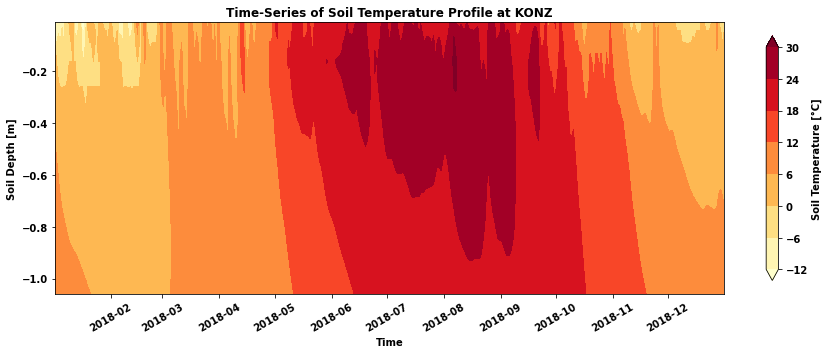

In [6]:
import os
from neon_utils import plot_soil_profile_timeseries
username = os.environ['USER']  # Get our username, for use in paths
sim_path = "/scratch/"+username+"/CLM-NEON/archive/"+neon_site+".transient/lnd/hist/"

case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'TSOI', year)

You might also be interested in the soil moisture at this site. The `plot_soil_profile_timeseries` function can also plot soil moisture (`H2OSOI`). Run the below cell to see the soil moisture profile for 2018. You can change the `year` variable below to plot different years from 2018 through 2020.


All Simulation files: [ 365 files]


100%|██████████| 365/365 [00:05<00:00, 68.22it/s]


Reading all simulation files [ 365 files] took: 9.399982213973999 s.
Making this plot took  9.444050788879395 s.


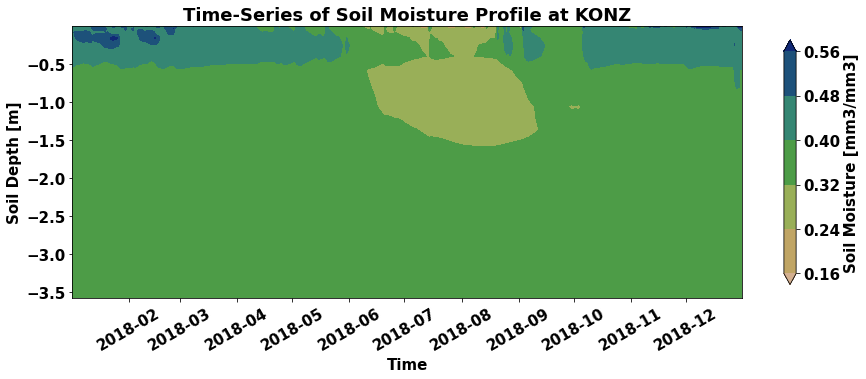

In [7]:
case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'H2OSOI', year)

<div class="alert alert-success">
<strong>Congratulations!</strong> 
    
You have now completed a NEON tower simulation, located the files, and made a plot from the simulation data.
</div>


**Additional examples of visualizations and evaluation of your NEON simulation against NEON observations are available in the  [NEON Visualization Tutorial](https://ncar.github.io/ncar-neon-books/notebooks/NEON_Visualization_Tutorial.html).**

At this point you've done all your "homework"!  Stop here, and we'll cover the rest during the live tutorial itself.